In [1]:
from model import efficientnet_b0
model = efficientnet_b0(num_classes=3)

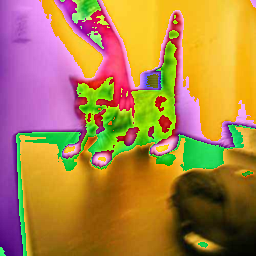

<class 'torch.Tensor'>
torch.Size([1, 3])
tensor(2)
tensor(0.0999, grad_fn=<SelectBackward0>)


In [2]:
from PIL import Image
import torchvision
import torchvision.transforms as transforms

im = Image.open('/home/jh/Blog/dataset/train/cat/cat.0.jpg')
# im = Image.open('cat01.jpeg')
# display(im)

transform = transforms.Compose([
     transforms.Resize((256, 256)),
    transforms.ToTensor(),
    transforms.Normalize([0.5, 0.5, 0.5], [0.5, 0.5, 0.5])
    ])


display(transforms.ToPILImage()(transform(im)))
input_tensor = transform(im).unsqueeze(0)
output=model(input_tensor)

print(type(output))
# print(output)
print(output.shape)
print(output.argmax())
print(output[0][output.argmax()])

batchsize数据集的尺寸集合： torch.Size([10, 3, 256, 256])
torch.Size([3, 256, 256])


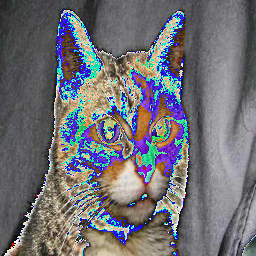

In [3]:
from dataset import build_data_set
from torch.utils.data import DataLoader
from torchvision import transforms 

data='/home/jh/Blog/dataset/train'

# 取训练集合里的图片
data_get = build_data_set(dest_image_size=256,data=data)
data_loader = DataLoader(data_get, batch_size=10)

# 使用迭代器，一次取一个，1个是32个大小
data_iter = iter(data_loader)
img_tensor, label_tensor = data_iter.__next__()
                         
# 打印输出
print('batchsize数据集的尺寸集合：',img_tensor.shape)
print(img_tensor[9].shape)
display(transforms.ToPILImage()(img_tensor[9]))